In [ ]:
import pandas as pd
Data = pd.read_csv('/content/Social_Network_Ads (1).csv')
Data.head(500)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
243,15769596,Female,56,104000,1
244,15586996,Female,41,72000,0
245,15722061,Female,51,146000,1
246,15638003,Female,35,50000,0


In [ ]:
X = Data.drop(columns='Purchased')
y = Data['Purchased']

In [ ]:
!pip install scikit-learn  # Install scikit-learn if you haven't already

import pandas as pd
from sklearn.model_selection import train_test_split  # Import the function for splitting data

# Prepare features and target variable
X = Data.drop(columns='Purchased')  # Features (all columns except 'Purchased')
y = Data['Purchased']  # Target variable ('Purchased' column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you have your training and testing sets ready for further analysis or model training!
print("X_train shape:", X_train.shape)

X_train shape: (173, 4)


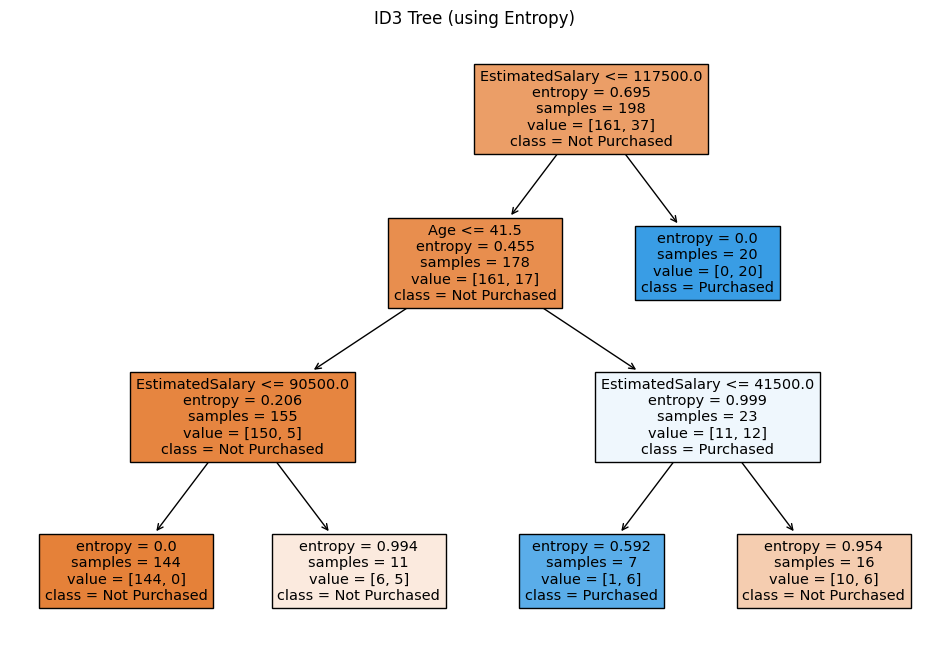

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Drop rows with missing values (if any)
Data.dropna(inplace=True)

# Convert 'Gender' column to numeric using one-hot encoding
Data_encoded = pd.get_dummies(Data, columns=['Gender'], drop_first=True)

# Define features (X) and target (y)
X = Data_encoded.drop('Purchased', axis=1)
y = Data_encoded['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree Classifier with entropy criterion (ID3-like)
id3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
id3.fit(X_train, y_train)

# Visualize the ID3 tree
plt.figure(figsize=(12,8))
plot_tree(id3, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True)  # Adjust class names as needed
plt.title('ID3 Tree (using Entropy)')
plt.show()

In [ ]:
accuracy = id3.score(X_test, y_test)
print(f"Accuracy of the ID3 Decision Tree model: {accuracy:.2f}")

Accuracy of the ID3 Decision Tree model: 0.86


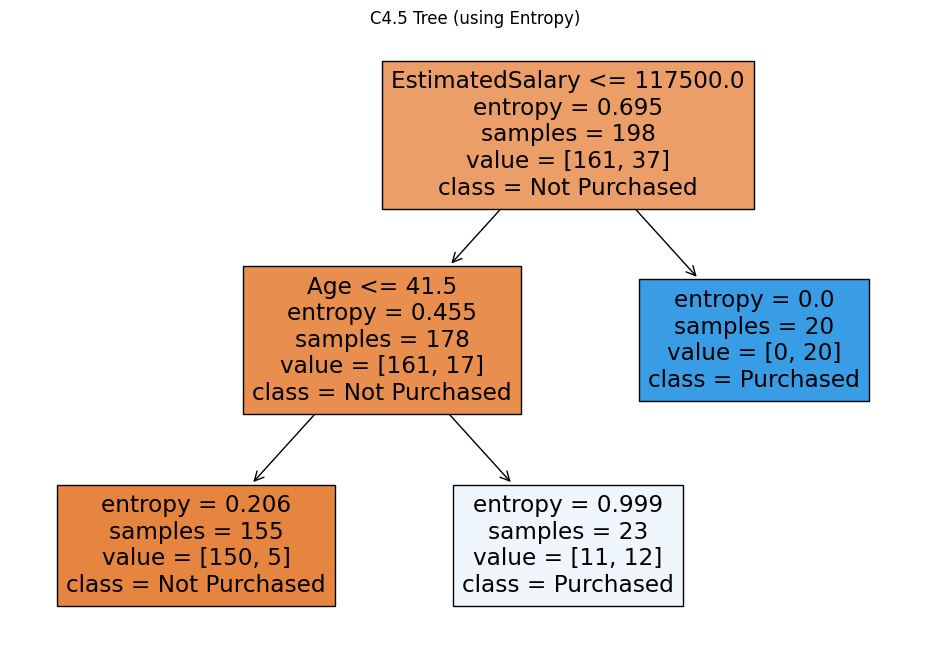

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Sample dataset
data = pd.read_csv('/content/Social_Network_Ads (1).csv')

# Create a DataFrame
df = pd.DataFrame(data)

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(['User ID', 'Purchased'], axis=1)
y = df_encoded['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the C4.5-like model (using entropy criterion and best splitter)
c45 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=2)
c45.fit(X_train, y_train)

# Visualize the C4.5 tree
plt.figure(figsize=(12, 8))
plot_tree(c45, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title('C4.5 Tree (using Entropy)')
plt.show()


In [ ]:
accuracy_c45 = c45.score(X_test, y_test)
print(f"Accuracy of the C4.5 Decision Tree model: {accuracy_c45:.2f}")

Accuracy of the C4.5 Decision Tree model: 0.90


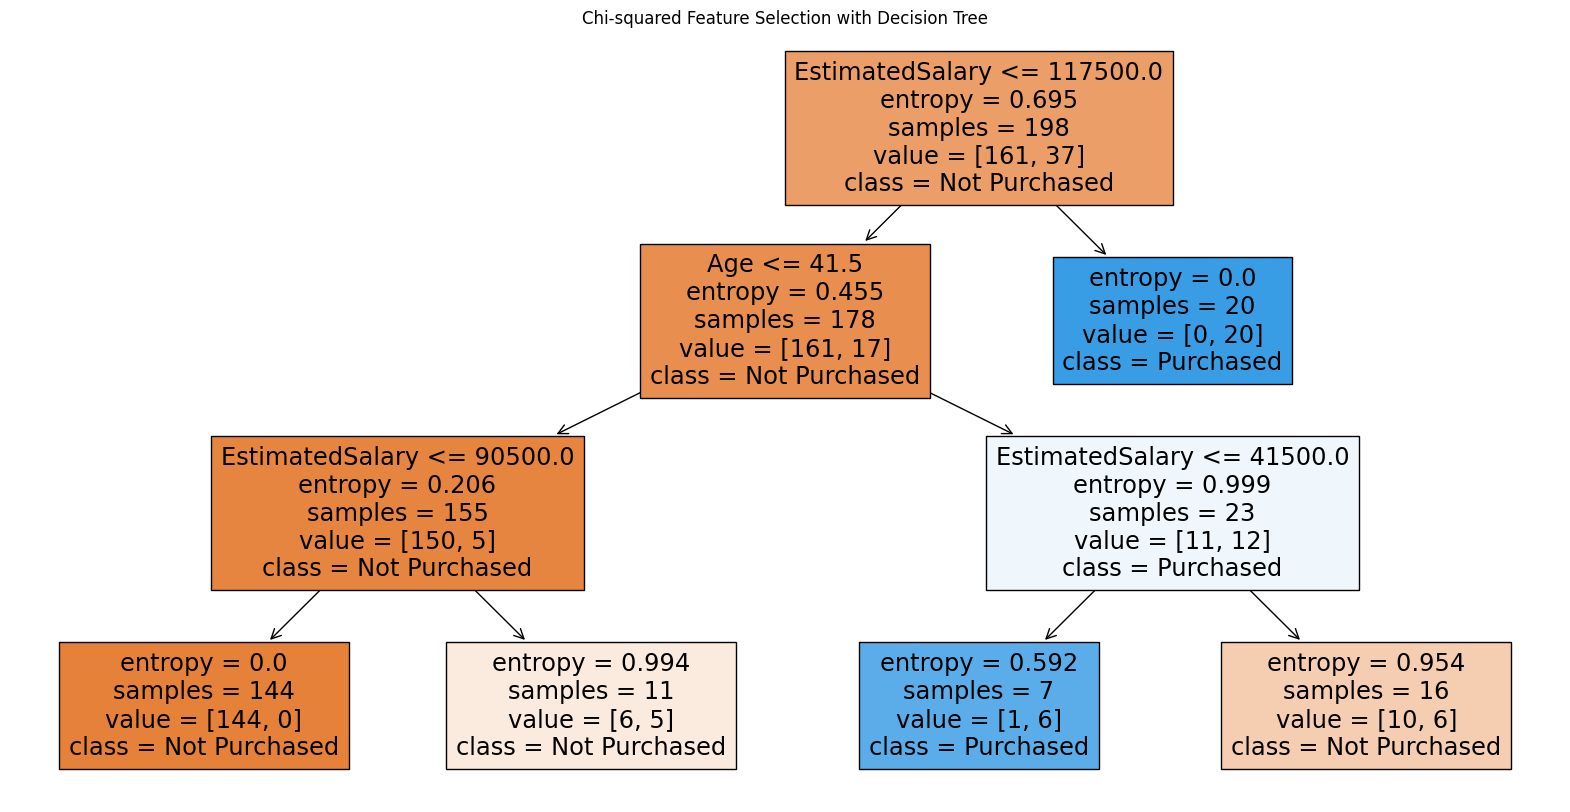

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Sample dataset
data = pd.read_csv('/content/Social_Network_Ads (1).csv')

# Create a DataFrame
df = pd.DataFrame(data)

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(['User ID', 'Purchased'], axis=1)
y = df_encoded['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with chi-squared feature selection and decision tree classifier
pipeline = Pipeline([
    ('feature_selection', SelectKBest(chi2, k='all')),  # Select all features (or adjust k as needed)
    ('classification', DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3))  # Using 'entropy' as criterion
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20,10))
tree.plot_tree(pipeline.named_steps['classification'], feature_names=X.columns[pipeline.named_steps['feature_selection'].get_support()], class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title('Chi-squared Feature Selection with Decision Tree')
plt.show()


In [ ]:
accuracy_chi_pipeline = pipeline.score(X_test, y_test)
print(f"Accuracy of the Chi-squared feature selection with Decision Tree model: {accuracy_chi_pipeline:.2f}")

Accuracy of the Chi-squared feature selection with Decision Tree model: 0.86


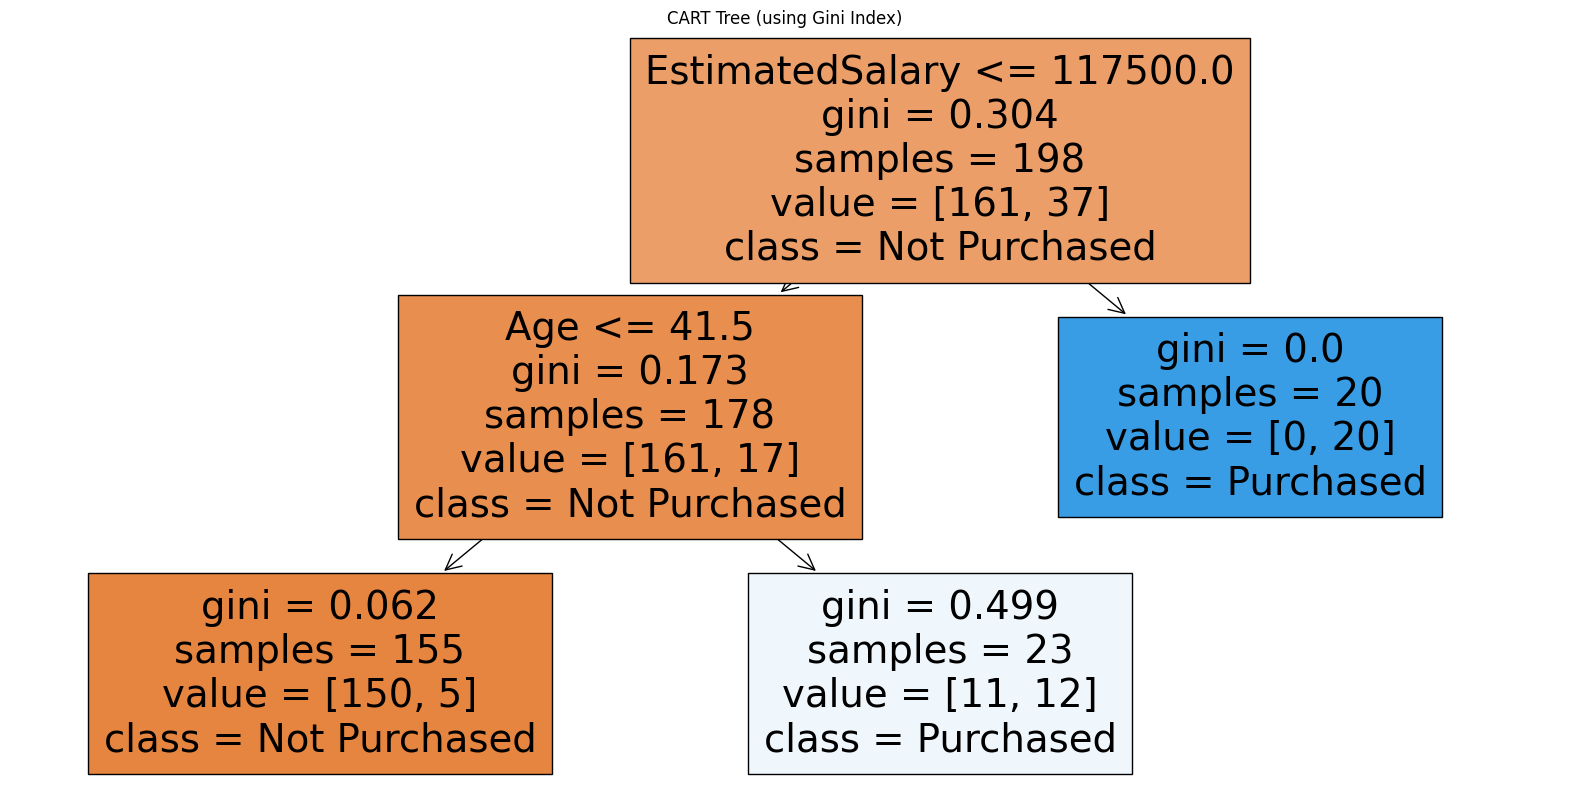

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv('/content/Social_Network_Ads (1).csv')

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(['User ID', 'Purchased'], axis=1)
y = df_encoded['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the CART model (using Gini index)
cart = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2)
cart.fit(X_train, y_train)

# Visualize the CART tree
plt.figure(figsize=(20,10))
plot_tree(cart, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title('CART Tree (using Gini Index)')
plt.show()

In [ ]:
# Calculate the accuracy on the test set
accuracy_cart = cart.score(X_test, y_test)
print(f"Accuracy of the CART Decision Tree model: {accuracy_cart:.2f}")


Accuracy of the CART Decision Tree model: 0.90


Pre-Pruned CART Training Accuracy: 0.94
Pre-Pruned CART Test Accuracy: 0.86


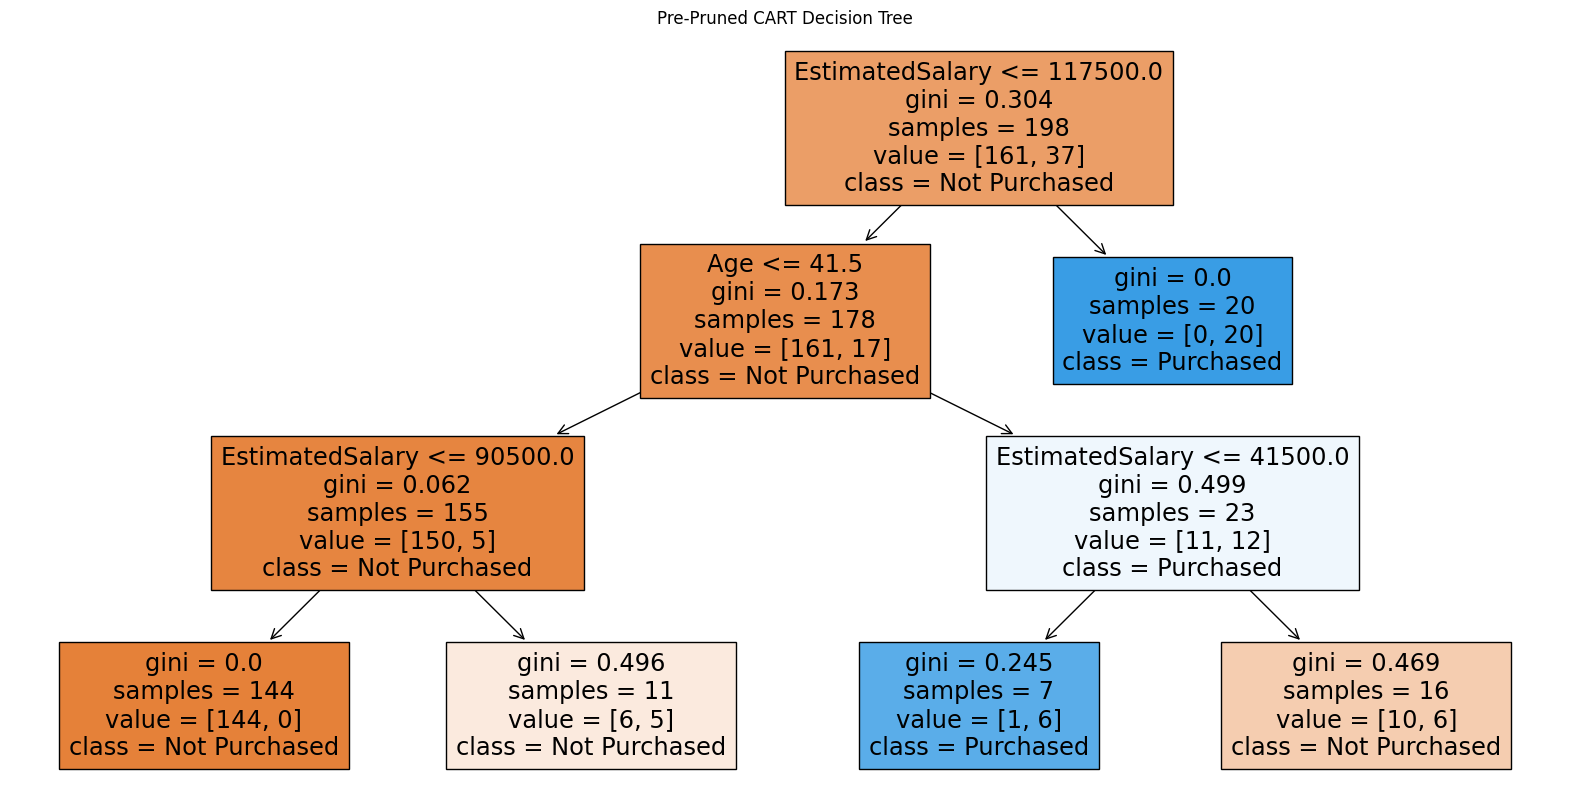

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv('/content/Social_Network_Ads (1).csv')

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(['User ID', 'Purchased'], axis=1)
y = df_encoded['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a pre-pruned CART model
pre_pruned_cart = DecisionTreeClassifier(
    criterion='gini',  # CART uses Gini index
    splitter='best',
    max_depth=3,  # Limit tree depth
    min_samples_split=5,  # Minimum samples required to split an internal node
    min_samples_leaf=5,  # Minimum samples required at a leaf node
    max_leaf_nodes=10  # Limit the number of leaf nodes
)
pre_pruned_cart.fit(X_train, y_train)

# Evaluate the pre-pruned tree
train_accuracy_pre_pruned = accuracy_score(y_train, pre_pruned_cart.predict(X_train))
test_accuracy_pre_pruned = accuracy_score(y_test, pre_pruned_cart.predict(X_test))

print(f"Pre-Pruned CART Training Accuracy: {train_accuracy_pre_pruned:.2f}")
print(f"Pre-Pruned CART Test Accuracy: {test_accuracy_pre_pruned:.2f}")

# Visualize the pre-pruned CART tree
plt.figure(figsize=(20,10))
plot_tree(pre_pruned_cart, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title('Pre-Pruned CART Decision Tree')
plt.show()


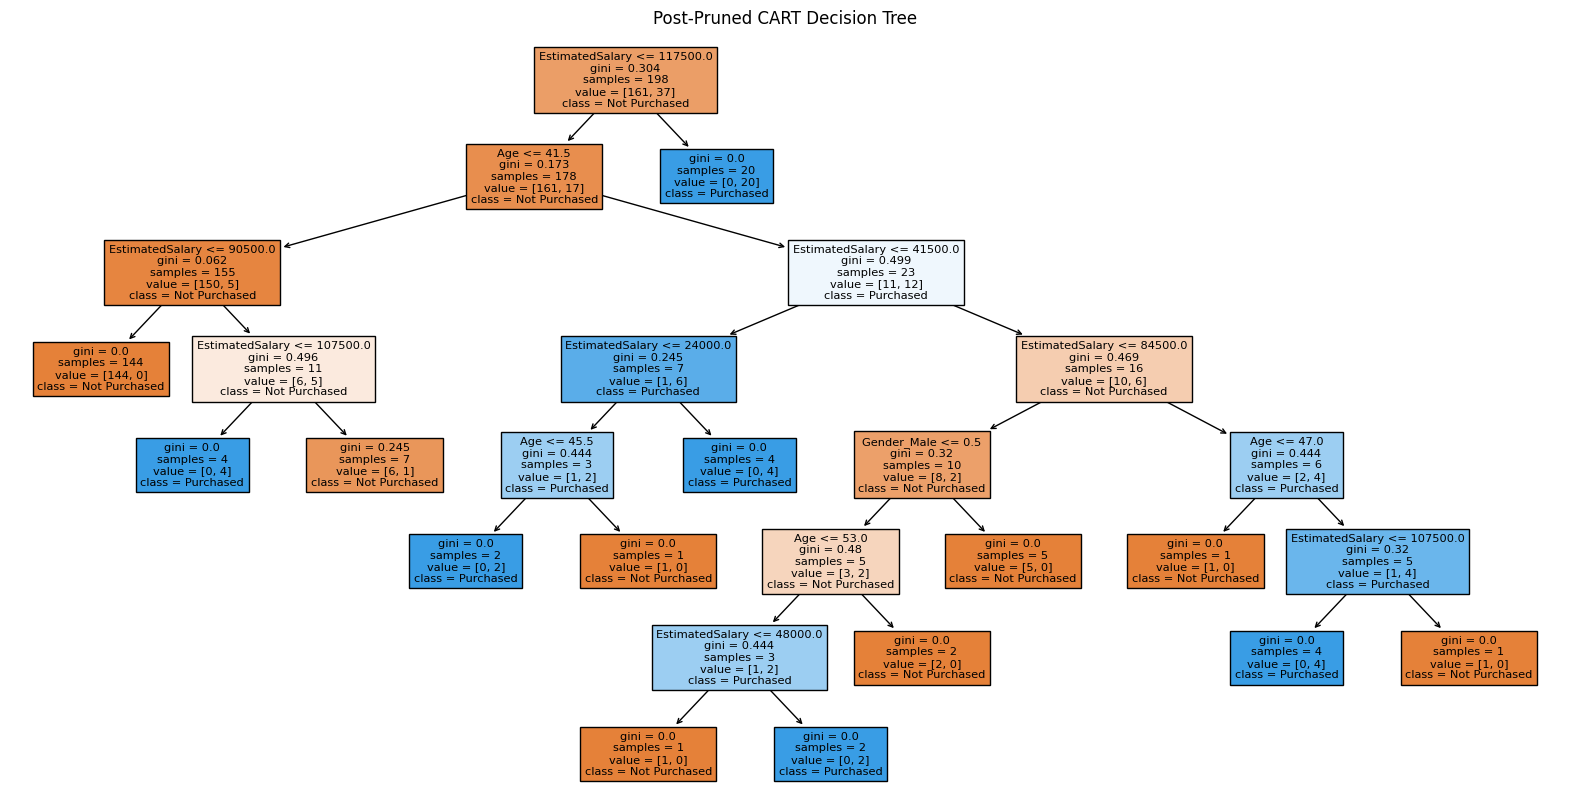

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv('/content/Social_Network_Ads (1).csv')

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(['User ID', 'Purchased'], axis=1)
y = df_encoded['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a fully grown CART model first
full_cart = DecisionTreeClassifier(
    criterion='gini',  # CART uses Gini index
    splitter='best'
)
full_cart.fit(X_train, y_train)

# Get the pruning path
path = full_cart.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Choose an alpha value (e.g., using cross-validation)
alpha = ccp_alphas[1]  # Adjust alpha based on validation results

# Create and fit the post-pruned CART model
post_pruned_cart = DecisionTreeClassifier(
    criterion='gini',  # CART uses Gini index
    splitter='best',
    ccp_alpha=alpha  # Apply pruning
)
post_pruned_cart.fit(X_train, y_train)

# Evaluate the post-pruned tree
train_accuracy_post_pruned = accuracy_score(y_train, post_pruned_cart.predict(X_train))
test_accuracy_post_pruned = accuracy_score(y_test, post_pruned_cart.predict(X_test))

# Visualize the post-pruned CART tree
plt.figure(figsize=(20,10))
plot_tree(post_pruned_cart, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title('Post-Pruned CART Decision Tree')
plt.show()


In [ ]:
print(f"Post-Pruned CART Training Accuracy: {train_accuracy_post_pruned:.2f}")
print(f"Post-Pruned CART Test Accuracy: {test_accuracy_post_pruned:.2f}")

Post-Pruned CART Training Accuracy: 0.99
Post-Pruned CART Test Accuracy: 0.86


In [ ]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('/content/Social_Network_Ads (1).csv')

# Filter the dataset for Age values between 25 and 30
near_value = df[(df['Age'] >= 25) & (df['Age'] <= 30)]

# Sort the values by Age and display them
near_value_sorted = near_value.sort_values(by='Age')
print(near_value_sorted[['Age']])


     Age
46    25
70    25
177   25
8     25
161   25
..   ...
43    30
128   30
48    30
143   30
91    30

[68 rows x 1 columns]


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv('/content/Social_Network_Ads (1).csv')

# Modify values around a specific threshold (adjust this based on your actual column)
df['EstimatedSalary_modified'] = df['EstimatedSalary'].apply(lambda x: 50000 if x == 55000 else x)

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(['User ID', 'Purchased', 'EstimatedSalary'], axis=1)  # Drop original EstimatedSalary
X['EstimatedSalary'] = df['EstimatedSalary_modified']  # Use the modified column
y = df_encoded['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the CART model with the modified feature
cart_modified = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2)
cart_modified.fit(X_train, y_train)

# Evaluate the modified CART model
train_accuracy_modified = accuracy_score(y_train, cart_modified.predict(X_train))
test_accuracy_modified = accuracy_score(y_test, cart_modified.predict(X_test))


In [ ]:
print(f"Modified CART Training Accuracy: {train_accuracy_modified:.2f}")
print(f"Modified CART Test Accuracy: {test_accuracy_modified:.2f}")


Modified CART Training Accuracy: 0.92
Modified CART Test Accuracy: 0.90
